In [1]:
from MPyDATA.mpdata import MPDATA
import numpy as np
from matplotlib import pyplot

In [3]:
# <TODO> - remove
import pint
from MPyDATA.coord import x_id
si = pint.UnitRegistry()
fn = x_id(si)
si.setup_matplotlib()
# </TODO>

In [14]:
nt = 1600
dt = 1 * si.dimensionless
nx = 500
C = 0.5 * si.dimensionless
x_min = -250 * si.dimensionless
x_max = 250 * si.dimensionless


def cdf_cosine(x):
    x_mid = -150
    f = 2/12
    amplitude = 2

    pdf = np.where(
        np.abs(x-x_mid) < 10, 
        amplitude * np.cos(f*(x-x_mid)), 
        0)
    return np.cumsum(pdf) * si.dimensionless

def cdf_rect(x):
    x_mid = -150
    amplitude = 2
    offset = 2

    pdf = offset + np.where(
        np.abs(x-x_mid) <= 10, 
        amplitude, 
        0)
    return np.cumsum(pdf) * si.dimensionless


In [15]:
def plot(opts, title, cdf):
    mpdata = MPDATA(nx, x_min, x_max, dt, cdf, fn, opts)
    
    psi0 = mpdata.state.pdf.copy()
    for _ in range(nt): 
        mpdata.step(lambda x: C)
    psiT = mpdata.state.pdf
    
    pyplot.ylim([np.amin(psi0)-2, np.amax(psi0)+2])
    pyplot.plot(mpdata.state.r, psi0)
    pyplot.plot(mpdata.state.r, psiT)
    pyplot.title(title)

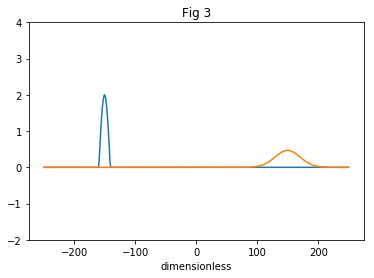

In [17]:
plot(title='Fig 3', opts={"n_it": 1, "bcond": 'periodic'}, cdf=cdf_cosine)

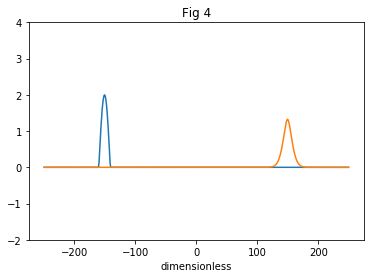

In [20]:
plot(title='Fig 4', opts={"n_it": 2, "bcond": 'periodic'}, cdf=cdf_cosine)

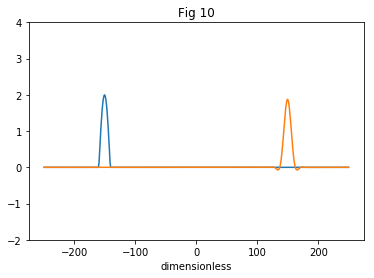

In [23]:
plot(title='Fig 10', opts={"n_it": 2, "bcond": 'periodic', 'iga': True}, cdf=cdf_cosine)

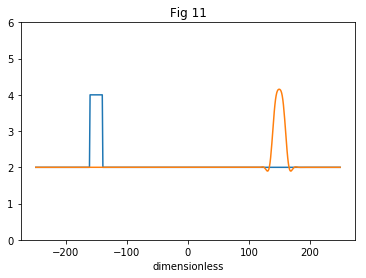

In [24]:
plot(title='Fig 11', opts={"n_it": 2, "bcond": 'periodic', 'iga': True}, cdf=cdf_rect)

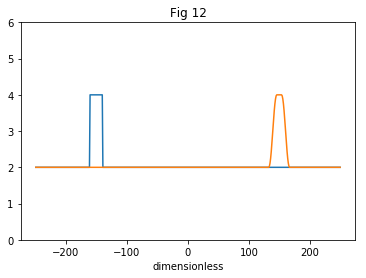

In [25]:
plot(title='Fig 12', opts={"n_it": 2, "bcond": 'periodic', 'iga': True, 'fct':True}, cdf=cdf_rect)